<a href="https://colab.research.google.com/github/Vasasiva-123/Basic-ML/blob/main/Final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


**read the data**

In [ ]:
df = pd.read_csv('winequalityN.csv')


In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.shape

(6497, 13)

**The data has 6497 rows and 13 column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)


fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
chlorides                2
residual sugar           2
quality                  0
alcohol                  0
density                  0
total sulfur dioxide     0
free sulfur dioxide      0
type                     0
dtype: int64

#**Replace missing values**

In [ ]:
missing_val_cols = ["fixed acidity", "pH", "volatile acidity", "sulphates", "citric acid", "residual sugar", "chlorides"]

In [ ]:
for col in missing_val_cols:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)
    

In [ ]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#**Data exploration**

In [ ]:
df['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [ ]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

#**Data Viz**

**White wine has many outliers for quality 6**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

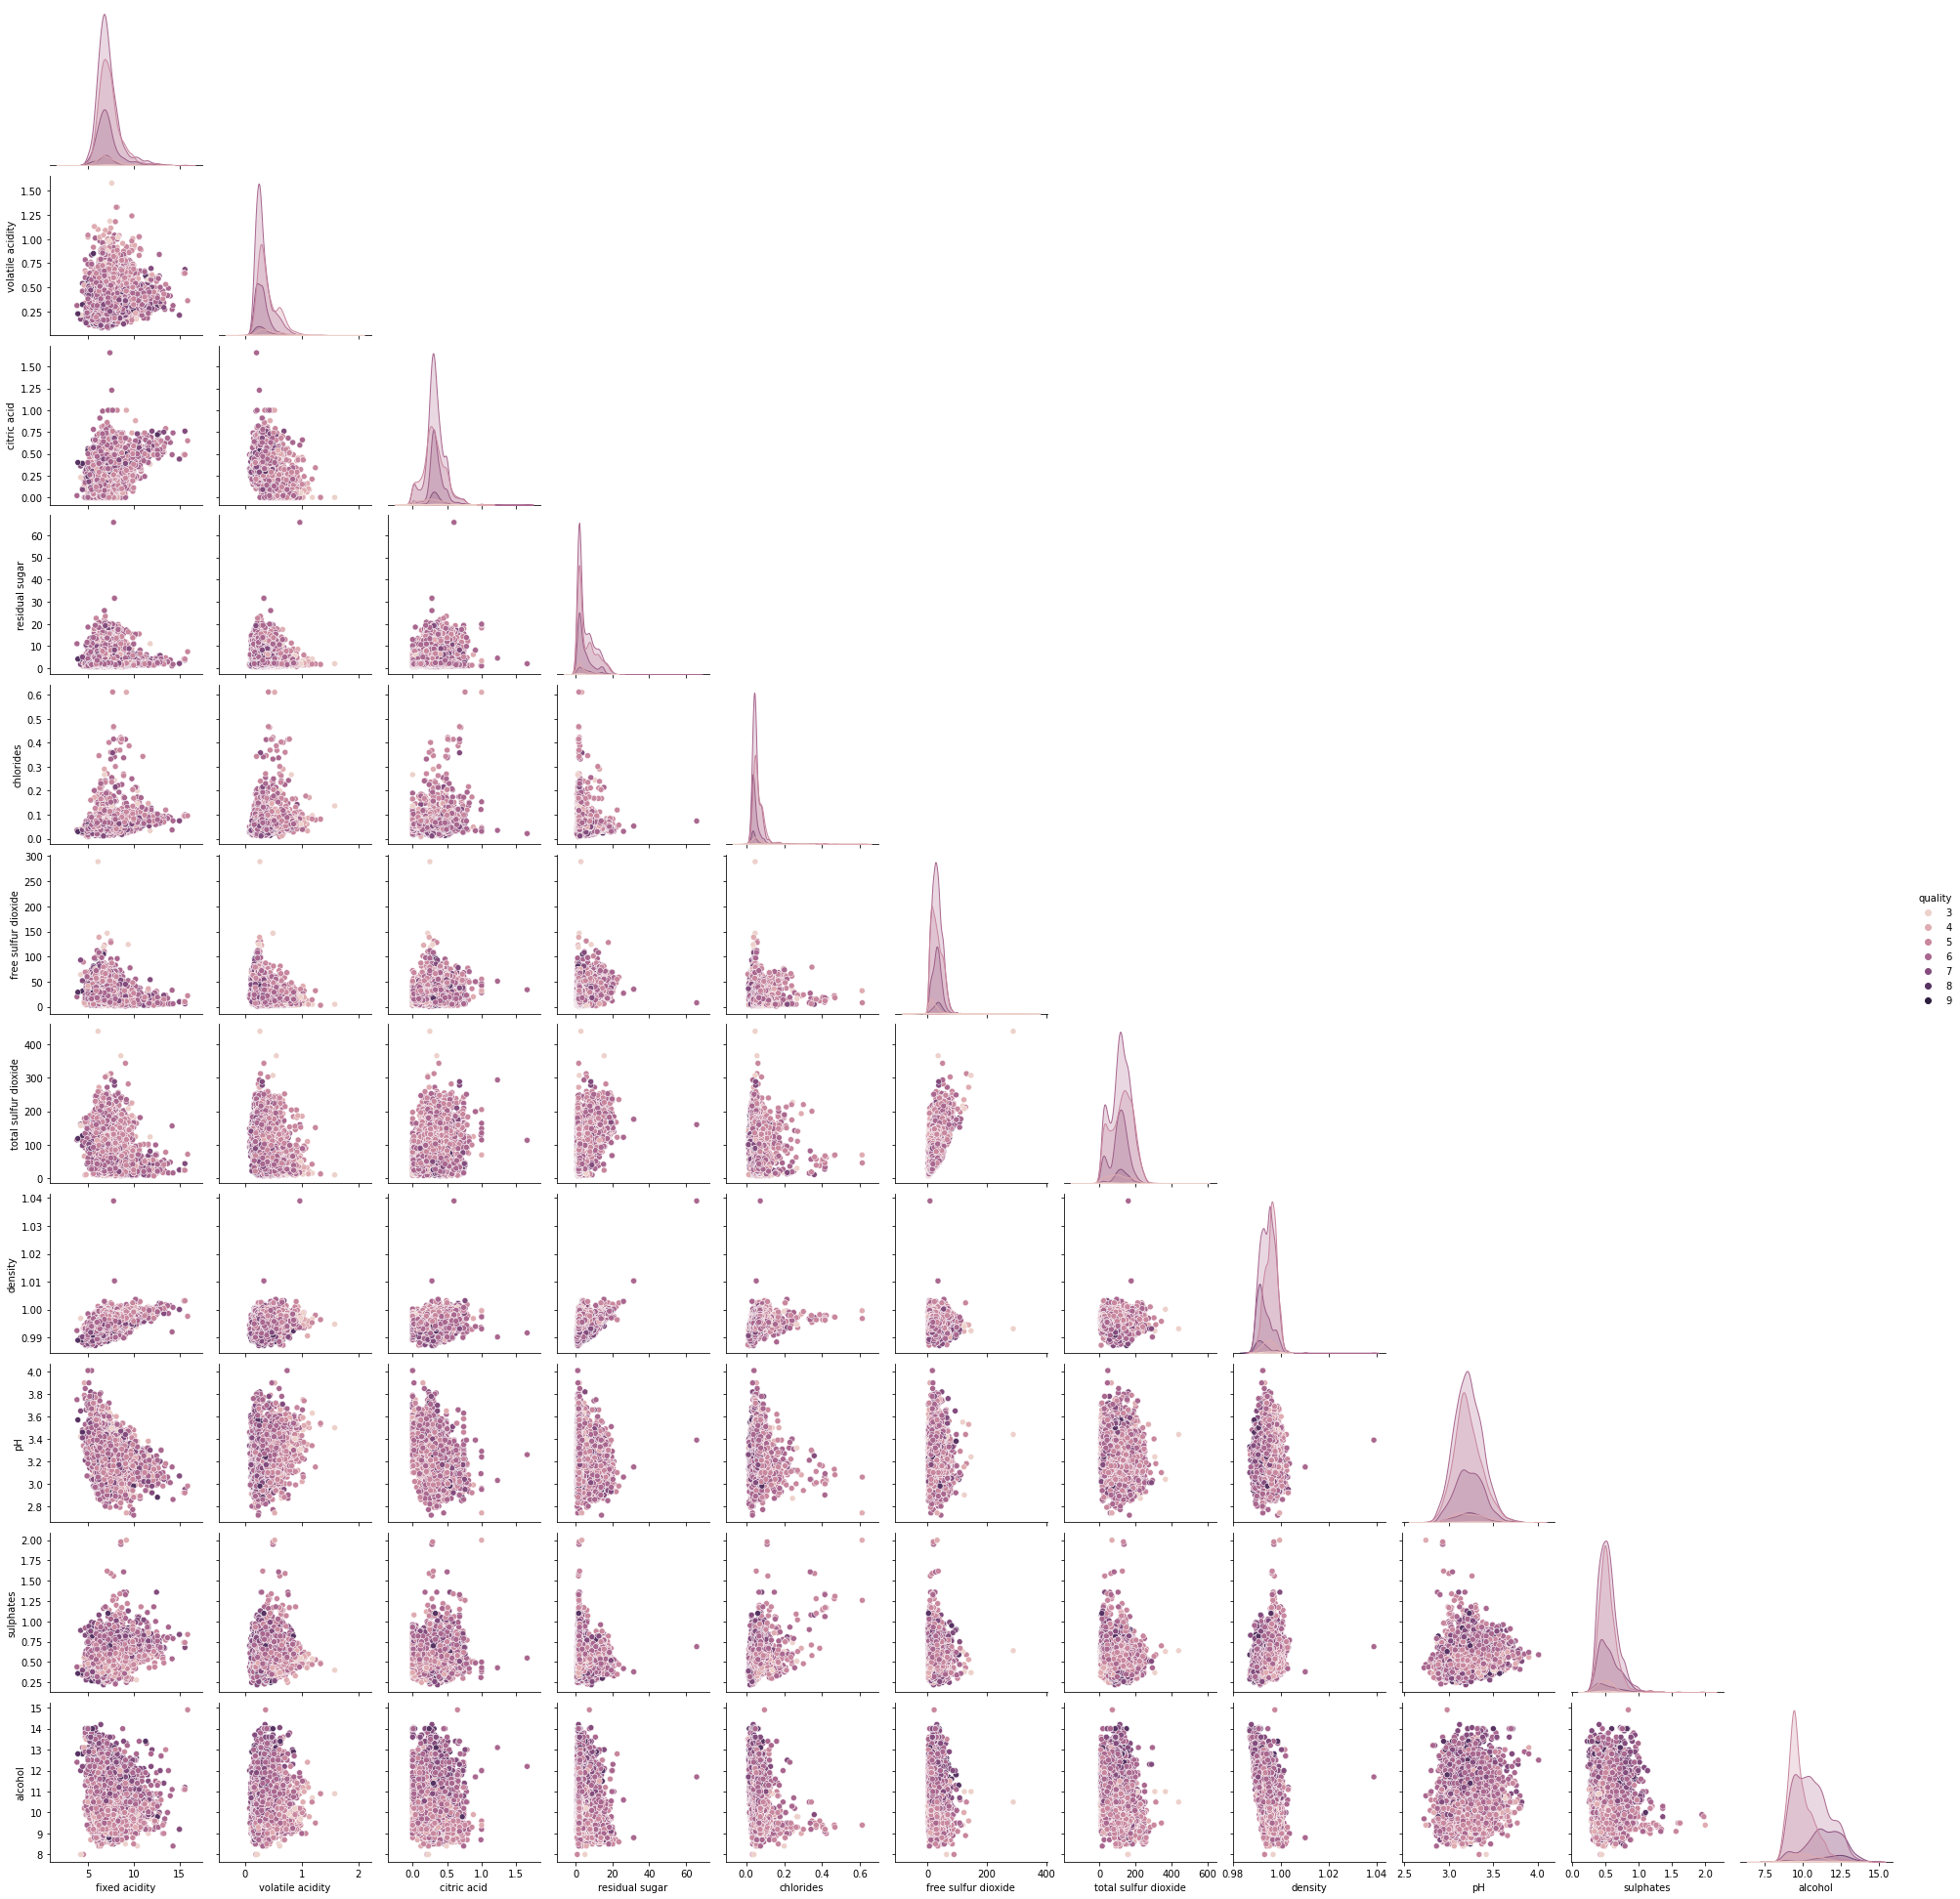

In [ ]:
sns.pairplot(df, hue='quality', corner=True)

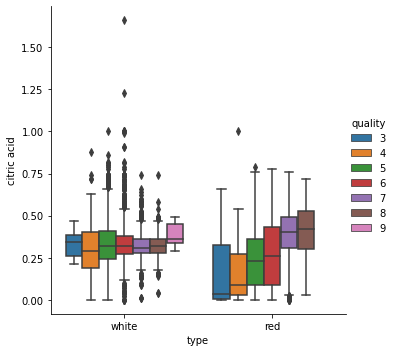

In [ ]:
sns.catplot(x="type", y="citric acid", kind="box", hue="quality", data=df)

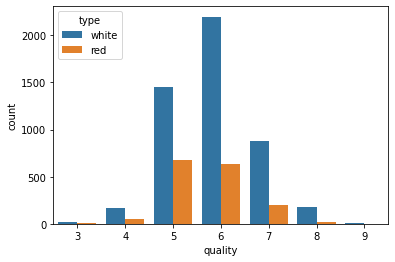

In [ ]:
sns.countplot(x="quality", hue="type", data=df)

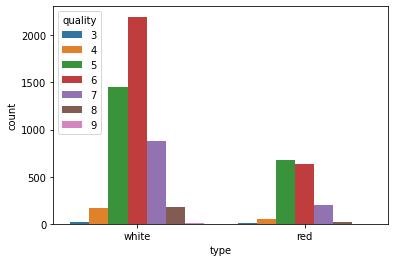

In [ ]:
sns.countplot(x="type", hue="quality", data=df)

In [ ]:
corr = df.corr()

**Rename the column ```type_white``` to ```wine_type```**

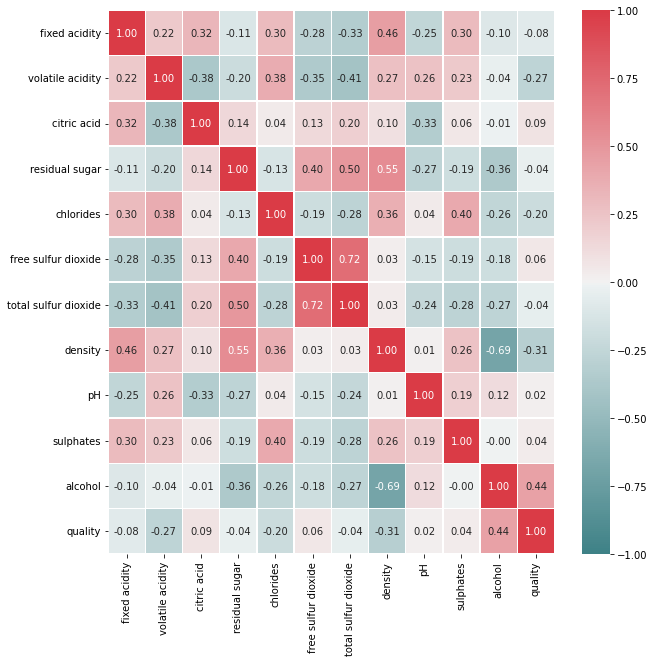

In [ ]:
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True), vmin=-1, vmax=1, linewidths=.5, fmt=".2f")


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


**Store the label in ```y```**

In [ ]:
df = df.rename(columns={"type_white": "wine_type"})


In [ ]:
df["wine_quality"] = [1 if x>6 else 0 for x in df.quality]

In [ ]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,wine_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0


In [ ]:
y = df["wine_quality"]

In [ ]:
y.value_counts()

0    5220
1    1277
Name: wine_quality, dtype: int64

**Store the feature columns in ```x```**

In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: wine_quality, Length: 6497, dtype: int64

In [ ]:
x = df.drop(["quality", "wine_quality"], axis=1)

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


#**Model Training**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
log = pd.DataFrame(columns=["model", "accuracy"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
clf = LogisticRegression(solver='liblinear')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

clf.score(X_train, y_train)

score = accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)

array([[1013,   34],
       [ 195,   58]])

In [ ]:
log = log.append({"model": "logistic regression", "accuracy": score}, ignore_index=True)

**C-support Vector Classification**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel="rbf",C=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score = accuracy_score(y_test, y_pred)


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1047,    0],
       [ 253,    0]])

In [ ]:
log = log.append({"model": "SVC", "accuracy": score}, ignore_index=True)

In [ ]:
log

,model,accuracy
0,logistic regression,0.823846
1,SVC,0.805385


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(random_state = 1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "Random Forest", "accuracy": score}, ignore_index=True)

In [ ]:
log

,model,accuracy
0,logistic regression,0.823846
1,SVC,0.805385
2,Random Forest,0.883846


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "Decision tree", "accuracy": score}, ignore_index=True)

In [ ]:
log

,model,accuracy
0,logistic regression,0.823846
1,SVC,0.805385
2,Random Forest,0.883846
3,Decision tree,0.838462


**K nearest neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "K nearest neighbours", "accuracy": score}, ignore_index=True)

In [ ]:
log

,model,accuracy
0,logistic regression,0.823846
1,SVC,0.805385
2,Random Forest,0.883846
3,Decision tree,0.838462
4,K nearest neighbours,0.806923


**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.predict(X_test)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
log = log.append({"model": "GaussianNB", "accuracy": score}, ignore_index=True)
print(log)

                  model  accuracy
0   logistic regression  0.823846
1                   SVC  0.805385
2         Random Forest  0.883846
3         Decision tree  0.838462
4  K nearest neighbours  0.806923
5            GaussianNB  0.769231


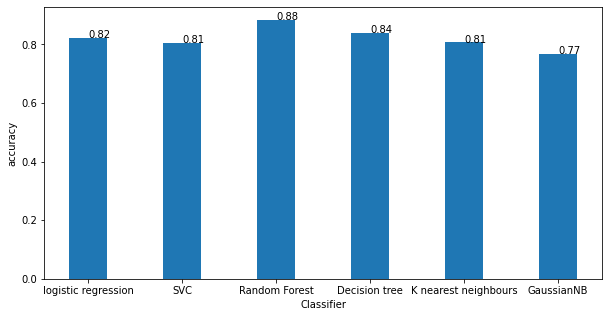

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(log["model"], log["accuracy"], width=0.4)
plt.xlabel("Classifier")
plt.ylabel("accuracy")
for index, value in enumerate(log["accuracy"]):
    plt.text(index,value, str(round(value, 2)))
plt.show()